In [1]:
from pycaret.utils import version
version()

'3.2.0'

In [2]:
import pandas as pd
from pycaret.classification import setup
from datetime import datetime
import sqlite3

# 1. Experiment 1 

## 1.1. Abstract

Inital trial for data created from data vault.
The features retieved are the GAME_STAISTIC. The aim of this note book is to learn how to use PyCaret

Best model with out any 


## 1.2. Retrieve Data

In [33]:
# Retriece data -the stats are from GAME Level

data_base=f'D:/AFL_GRP/DataBase/AFLDataVault.db'
connection=sqlite3.connect(database=data_base)
query=f''' 
Select  hg.game_hashkey 
       ,hg.year,hg.round,hg.team,hg.opponent 
       ,sgd.Ground,sgd.Team_Result
       ,sgs.Disposals_diff
       ,sgs.Kicks_diff
       ,sgs.Marks_diff
       ,sgs.Handballs_diff
       ,sgs.HitOuts_diff
       ,sgs.Tackles_diff
       ,sgs.Rebounds_diff
       ,sgs.Inside50_diff
       ,sgs.Clearances_diff
       ,sgs.Clangers_diff
       ,sgs.Frees_diff
       ,sgs.FreesAgainst_diff
       ,sgs.ContestedPossessions_diff
       ,sgs.UncontestedPossessions_diff
       ,sgs.ContestedMarks_diff
       ,sgs.MarksInside50_diff
       ,sgs.OnePercenters_diff
       ,sgs.Bounces_diff
       ,sgs.GoalAssists_diff
from h_game hg
join S_Game_Details sgd
on   hg.Game_hashkey=sgd.game_hashkey
join s_Game_statistics sgs
on   hg.game_hashkey=sgs.game_hashkey
where sgd.Team_Result <>9
--and hg.round='GF'
'''
df_feature=pd.read_sql(query,connection)

# store it here ay not need this line
df_feature.to_csv('d:/AFL_PYCARET/Experiment1.csv',index=False)
connection.close()

dataset=df_feature

In [4]:
# dataset.drop(['Year','Round','Team','Opponent','Ground']
#              ,axis=1
#              ,inplace=True)


## 1.3. Analyse data.

In [34]:
reg_setup=setup(data=dataset
                ,target='Team_Result')

,Description,Value
0,Session id,6660
1,Target,Team_Result
2,Target type,Binary
3,Original data shape,"(4097, 26)"
4,Transformed data shape,"(4097, 83)"
5,Transformed train set shape,"(2867, 83)"
6,Transformed test set shape,"(1230, 83)"
7,Numeric features,20
8,Categorical features,5
9,Preprocess,True


In [35]:
data = dataset.sample(frac=0.9,random_state=123)
data_unseen=dataset.drop(data.index)

data.reset_index(drop=True,inplace=True)
data_unseen.reset_index(drop=True,inplace=True)

print(f'Data for Modelling: {str(data.shape)}')
print(f'Unseen Data for Prediction: {str(data_unseen.shape)}')



Data for Modelling: (3687, 26)
Unseen Data for Prediction: (410, 26)


In [36]:
data.nunique()

Game_Hashkey                   3687
Year                             22
Round                            30
Team                             18
Opponent                         18
Ground                           26
Team_Result                       2
Disposals_diff                  310
Kicks_diff                      204
Marks_diff                      170
Handballs_diff                  212
HitOuts_diff                    111
Tackles_diff                     83
Rebounds_diff                    73
Inside50_diff                    93
Clearances_diff                  61
Clangers_diff                    64
Frees_diff                       42
FreesAgainst_diff                42
ContestedPossessions_diff       110
UncontestedPossessions_diff     277
ContestedMarks_diff              39
MarksInside50_diff               55
OnePercenters_diff               75
Bounces_diff                     75
GoalAssists_diff                 43
dtype: int64

In [37]:
data.columns

Index(['Game_Hashkey', 'Year', 'Round', 'Team', 'Opponent', 'Ground',
       'Team_Result', 'Disposals_diff', 'Kicks_diff', 'Marks_diff',
       'Handballs_diff', 'HitOuts_diff', 'Tackles_diff', 'Rebounds_diff',
       'Inside50_diff', 'Clearances_diff', 'Clangers_diff', 'Frees_diff',
       'FreesAgainst_diff', 'ContestedPossessions_diff',
       'UncontestedPossessions_diff', 'ContestedMarks_diff',
       'MarksInside50_diff', 'OnePercenters_diff', 'Bounces_diff',
       'GoalAssists_diff'],
      dtype='object')

In [38]:
numerical=[ 'Kicks_diff', 'Marks_diff',
       'Handballs_diff', 'HitOuts_diff', 'Tackles_diff', 'Rebounds_diff',
       'Inside50_diff', 'Clearances_diff', 'Clangers_diff', 'Frees_diff',
       'FreesAgainst_diff', 'ContestedPossessions_diff',
       'UncontestedPossessions_diff', 'ContestedMarks_diff',
       'MarksInside50_diff', 'OnePercenters_diff', 'Bounces_diff',
       'GoalAssists_diff']
ignore=['Game_Hashkey', 'Year', 'Round', 'Team', 'Opponent', 'Ground','Disposals_diff'] # Diposal = kicks + Hadballs


## Seting up Envirornment in PyCaret

**setup():**

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes two mandatory parameters: data and target. All the other parameters are optional.

In [39]:
from pycaret.classification import *

In [40]:
exp1=ClassificationExperiment()
exp1.setup(data=data
           ,ignore_features=ignore
           ,target='Team_Result'
           ,session_id=555
           ,train_size=0.8
           ,preprocess=False
           ,numeric_features=numerical)

,Description,Value
0,Session id,555
1,Target,Team_Result
2,Target type,Binary
3,Original data shape,"(3687, 26)"
4,Transformed data shape,"(3687, 19)"
5,Transformed train set shape,"(2949, 19)"
6,Transformed test set shape,"(738, 19)"
7,Ignore features,7
8,Numeric features,18


## Compare Models

This function trains and evaluates performance of all estimators available in the model library using cross validation(CV). The output of this function is a score grid with average cross validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [41]:
performance_exp1=exp1.compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9173,0.9758,0.9315,0.9263,0.9287,0.8301,0.8305,0.4620
ridge,Ridge Classifier,0.9132,0.0000,0.9303,0.9208,0.9254,0.8216,0.8221,0.0080
lda,Linear Discriminant Analysis,0.9132,0.9740,0.9297,0.9213,0.9253,0.8217,0.8221,0.0090
qda,Quadratic Discriminant Analysis,0.9074,0.9697,0.9250,0.9161,0.9205,0.8097,0.8100,0.0100
catboost,CatBoost Classifier,0.9000,0.9688,0.9203,0.9084,0.9141,0.7944,0.7950,1.6650
gbc,Gradient Boosting Classifier,0.8966,0.9656,0.9174,0.9055,0.9113,0.7873,0.7878,0.2310
lightgbm,Light Gradient Boosting Machine,0.8959,0.9655,0.9156,0.9057,0.9105,0.7861,0.7864,0.0840
ada,Ada Boost Classifier,0.8915,0.9632,0.9063,0.9064,0.9062,0.7775,0.7779,0.0840
rf,Random Forest Classifier,0.8851,0.9589,0.9080,0.8958,0.9015,0.7634,0.7644,0.1830
et,Extra Trees Classifier,0.8847,0.9600,0.9174,0.8877,0.9021,0.7620,0.7631,0.1150


In [13]:
performance_exp1

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=555, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=555, solver='auto',
                 tol=0.0001),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001)]

## Create Model

This function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a score grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function. All the available models can be accessed using the models function.

In [14]:
lr = exp1.create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8949,0.9688,0.9181,0.9023,0.9101,0.7836,0.7838
1,0.8949,0.9697,0.8889,0.9268,0.9075,0.7860,0.7869
2,0.9356,0.9827,0.9532,0.9368,0.9449,0.8674,0.8676
3,0.9085,0.9664,0.9240,0.9186,0.9213,0.8120,0.8120
4,0.9288,0.9798,0.9415,0.9360,0.9388,0.8538,0.8538
5,0.9220,0.9792,0.9532,0.9157,0.9341,0.8388,0.8398
6,0.9017,0.9754,0.9123,0.9176,0.9150,0.7985,0.7985
7,0.9220,0.9724,0.9294,0.9349,0.9322,0.8405,0.8405
8,0.9492,0.9869,0.9471,0.9641,0.9555,0.8962,0.8964


## Tune Model

This function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize parameter. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [15]:
tune_lr=exp1.tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8949,0.9690,0.9181,0.9023,0.9101,0.7836,0.7838
1,0.8949,0.9694,0.8889,0.9268,0.9075,0.7860,0.7869
2,0.9356,0.9828,0.9532,0.9368,0.9449,0.8674,0.8676
3,0.9153,0.9666,0.9240,0.9294,0.9267,0.8263,0.8263
4,0.9288,0.9797,0.9415,0.9360,0.9388,0.8538,0.8538
5,0.9220,0.9791,0.9532,0.9157,0.9341,0.8388,0.8398
6,0.9017,0.9752,0.9123,0.9176,0.9150,0.7985,0.7985
7,0.9254,0.9728,0.9294,0.9405,0.9349,0.8476,0.8477
8,0.9492,0.9869,0.9471,0.9641,0.9555,0.8962,0.8964


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [16]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=555, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
tune_lr

LogisticRegression(C=0.117, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=555, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Plot Model
This function analyzes the performance of a trained model on holdout set. It may require re-training the model in certain cases

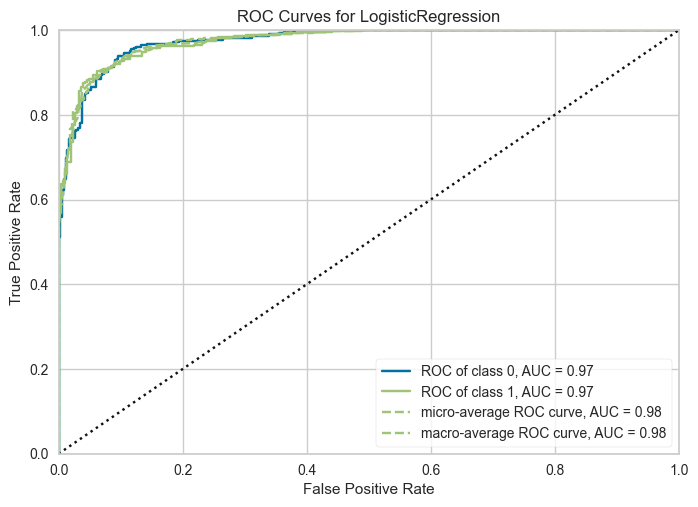

In [18]:
exp1.plot_model(lr, plot = 'auc')
# exp1.plot_model(lr, plot='pr')
# exp1.plot_model(lr, plot='confusion_matrix')
# exp1.plot_model(lr, plot='class_report')
# exp1.plot_model(lr, plot = 'boundary')
# exp1.plot_model(lr, plot = 'learning')
# exp1.plot_model(lr, plot = 'feature')
# exp1.plot_model(lr, plot = 'vc')

## Model calibration

When performing classification you often not only want to predict the class label (outcome such as 0 or 1), but also obtain the probability of the respective outcome which provides a level of confidence on the prediction. Some models can give you poor estimates of the class probabilities and some do not even support probability prediction. Well calibrated classifiers are probabilistic and provide outputs in the form of probabilities that can be directly interpreted as a confidence level. PyCaret allows you to calibrate the probabilities of a given model through the calibrate_model() function.

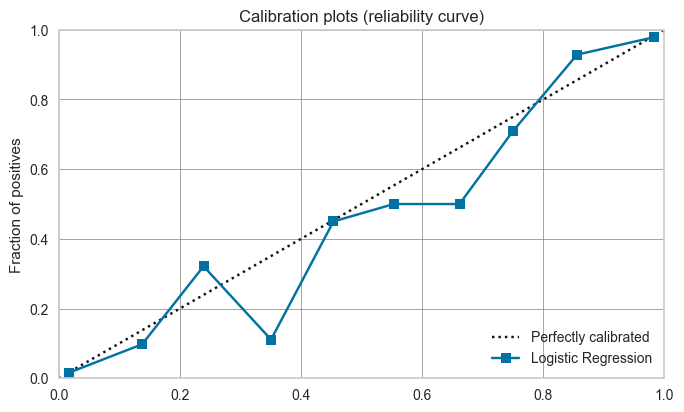

In [19]:
exp1.plot_model(lr, plot = 'calibration')

## Evaluate model
This function displays a user interface for analyzing performance of a trained model. It calls the plot_model function internally.

*I don't recommend using this evaluate model functionality! very slow plus bugs! do separate plots instead.*

In [20]:
exp1.evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Interpret model
This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (SHapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

*This function only supports tree based models for binary classification: et, catboost, rf, lightgbm, dt*

In [21]:
#exp1.interpret_model(lr)

## Predict Model
This function predicts Label using a trained model. When data is None, it predicts label on the holdout set.

In [22]:
holdout_pred = exp1.predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9146,0.9748,0.9368,0.9174,0.9270,0.8243,0.8245


## Finalize Model

This function trains a given estimator on the entire dataset including the holdout set.

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [23]:
final_model = exp1.finalize_model(lr)

In [24]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('placeholder', None),
                ('actual_estimator',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=555,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

### Final prediciton on unseen data

The predict_model() function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the data_unseen parameter. data_unseen is the variable created at the beginning of the tutorial and contains 10% of the original dataset which was never exposed to PyCaret.

In [25]:
unseen_predictions=exp1.predict_model(final_model,data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9171,0.9770,0.9231,0.9310,0.9270,0.8310,0.8310


In [26]:
unseen_predictions[['Team_Result','prediction_label','prediction_score']]

,Team_Result,prediction_label,prediction_score
0,1,1,0.9912
1,1,1,1.0000
2,0,0,0.8970
3,1,1,0.9968
4,0,0,0.9639
...,...,...,...
405,1,0,0.5588
406,0,0,0.9998
407,0,0,0.9999
408,0,0,0.9718


## Save Model
This function saves the transformation pipeline and trained model object into the current working directory as a pickle file for later use.

In [27]:
exp1.save_model(final_model, 'my_pycaret_classifier')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('placeholder', None),
                 ('actual_estimator',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=1000,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_state=555,
                                     solver='lbfgs', tol=0.0001, verbose=0,
                                     warm_start=False))],
          verbose=False),
 'my_pycaret_classifier.pkl')

## Load model
This function loads a previously saved pipeline.

In [28]:
my_classifier=load_model('my_pycaret_classifier')

Transformation Pipeline and Model Successfully Loaded


In [29]:
my_classifier

Pipeline(memory=FastMemory(location=C:\Users\Eduardo\AppData\Local\Temp\joblib),
         steps=[('placeholder', None),
                ('actual_estimator',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=555,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [30]:
from pycaret.classification import predict_model


In [31]:
predictions=predict_model(my_classifier,data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9171,0.9770,0.9231,0.9310,0.9270,0.8310,0.8310


In [32]:
predictions

,Disposals_diff,Kicks_diff,Marks_diff,Handballs_diff,HitOuts_diff,Tackles_diff,Rebounds_diff,Inside50_diff,Clearances_diff,Clangers_diff,...,ContestedPossessions_diff,UncontestedPossessions_diff,ContestedMarks_diff,MarksInside50_diff,OnePercenters_diff,Bounces_diff,GoalAssists_diff,Team_Result,prediction_label,prediction_score
0,-31,-8,-23,-23,1,-1,-3,9,3,-4,...,0,-33,3,-2,24,15,3,1,1,0.9912
1,90,56,54,34,17,15,-7,26,6,3,...,-5,87,7,17,12,8,9,1,1,1.0000
2,47,10,25,37,-7,5,6,-8,-5,8,...,2,54,3,-1,-7,-2,-2,0,0,0.8970
3,36,38,24,-2,-25,18,0,8,-3,-11,...,18,16,10,5,-6,3,0,1,1,0.9968
4,9,-2,-7,11,19,-25,-3,-5,2,-10,...,9,-3,0,1,1,-1,-3,0,0,0.9639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,11,31,19,-20,4,12,-15,15,-3,4,...,-3,8,5,0,-18,-7,-1,1,0,0.5588
406,-63,-55,-30,-8,-6,-3,-5,-5,-9,3,...,-10,-48,-6,-8,-7,3,-6,0,0,0.9998
407,-88,-44,-5,-44,5,-1,-2,-8,-12,11,...,-28,-59,-1,-9,-8,1,-6,0,0,0.9999
408,17,-33,-5,50,-26,1,2,-7,2,10,...,4,31,0,-2,-1,6,0,0,0,0.9718
